In [1]:
import glob

import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import skimage as ski
import numpy as np
%matplotlib widget



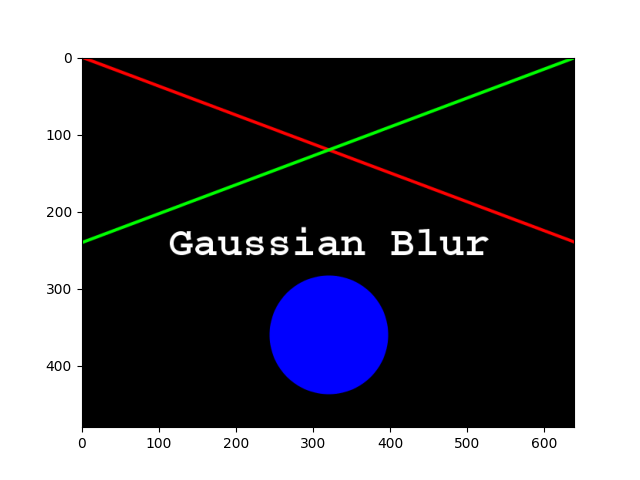

In [2]:
# load the image 
image = iio.imread(uri="data/gaussian-original.png")

# display the image 
fig, ax = plt.subplots()
ax.imshow(image)

In [3]:
sigma = 3.0 
# apply Gaussian blur, creating a new image
blurred = ski.filters.gaussian(
    image, sigma = (sigma, sigma), truncate=3.5, channel_axis=-1)
print(image.ndim)

3


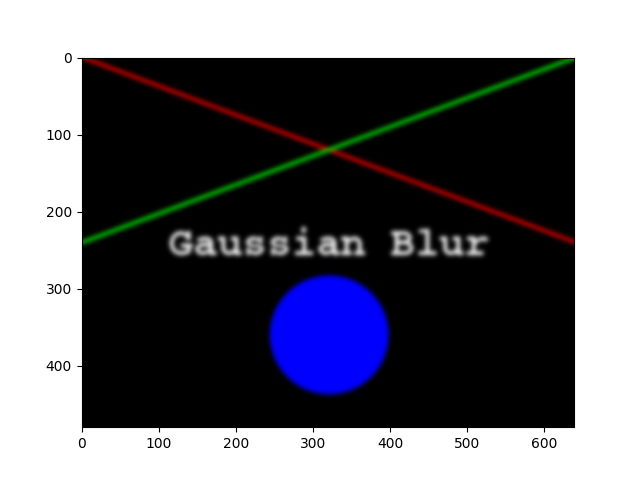

In [4]:
# display blurred image
fig, ax = plt.subplots()
ax.imshow(blurred)


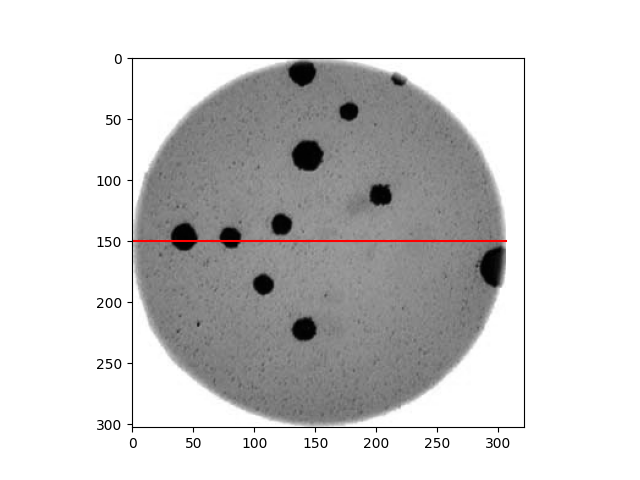

In [5]:
# we want to see the profile of intensities. For instance, let’s look for the intensities of the pixels along the horizontal line at Y=150:
# read colonies color image and convert to grayscale
image = iio.imread('data/colonies-01.tif')
image_gray = ski.color.rgb2gray(image)

# define the pixels for which we want to view the intensity (profile)
xmin, xmax = (0, image_gray.shape[1])
Y = ymin =  ymax = 150

# view the image indicating the profile pixels position
fig, ax = plt.subplots()
ax.imshow(image_gray, cmap='gray')
ax.plot([xmin, xmax], [ymin, ymax], color = 'red')


<class 'numpy.ndarray'>


Text(0.5, 0, 'X')

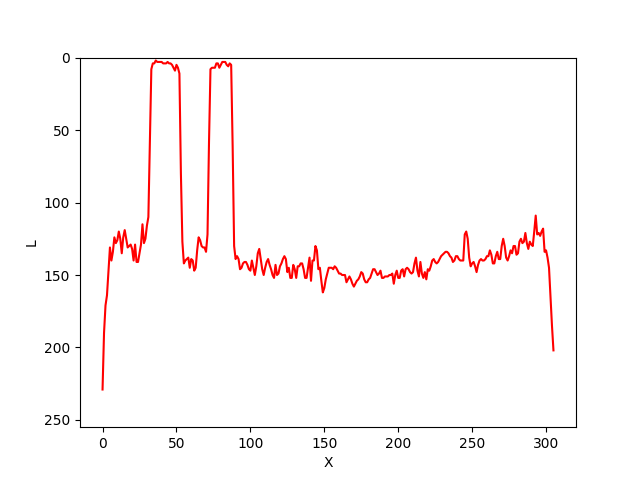

In [6]:
# select the vector of pixels along "Y"
image_gray_pixels_slice = image_gray[Y, :]
print(type(image_gray_pixels_slice))
# guarantee the intensity values are in the [0:255] range ( unsigned integers )
image_gray_pixels_slice = ski.img_as_ubyte(image_gray_pixels_slice)

fig, ax = plt.subplots()
ax.plot(image_gray_pixels_slice, color='red')
ax.set_ylim(255, 0)
ax.set_ylabel('L')
ax.set_xlabel('X')

Text(0.5, 0, 'X')

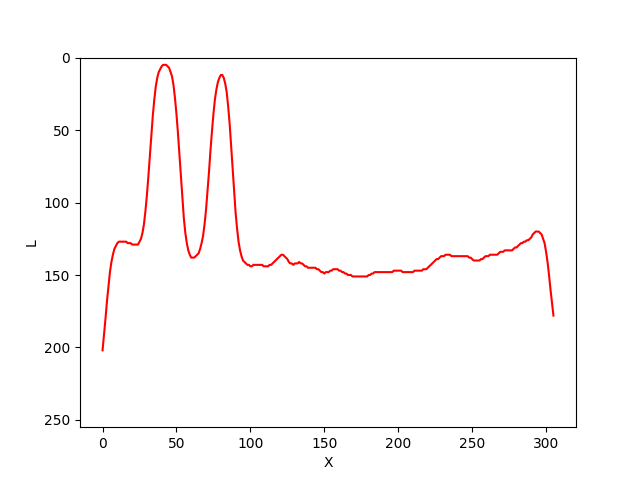

In [7]:
# first, create a blurred version of (grayscale) image
image_blur = ski.filters.gaussian(image_gray, sigma=3)

# like before, plot the pixels profile along "Y"
image_blur_pixels_slice = image_blur[Y, :]
image_blur_pixels_slice = ski.img_as_ubyte(image_blur_pixels_slice)

fig, ax = plt.subplots()
ax.plot(image_blur_pixels_slice, 'red')
ax.set_ylim(255, 0)
ax.set_ylabel('L')
ax.set_xlabel('X')



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


Text(0.5, 0, 'L')

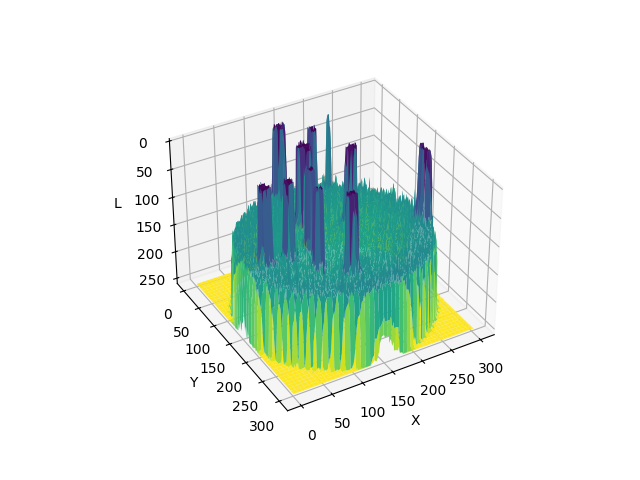

In [8]:
from skimage.util import img_as_ubyte
size = min(image_gray.shape)
print(np.arange(0, 15))
x = np.arange(0, size)
y = np.arange(0, size)
X,Y = np.meshgrid(x,y)

img = image_gray[:size,:size]
img = img_as_ubyte(img)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X,Y,img, cmap='viridis')

ax.view_init(elev=215, azim=-60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('L')

Text(0.5, 0, 'L')

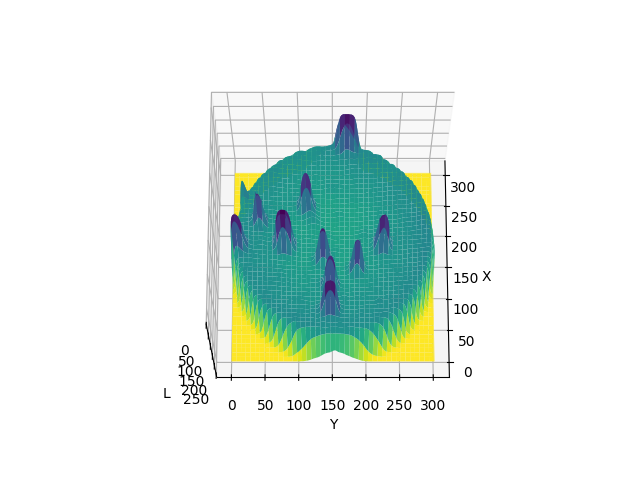

In [9]:
from skimage.util import img_as_ubyte
from skimage.filters import gaussian

image_blur = gaussian(image_gray, sigma=3)

size = min(image_blur.shape)
x = np.arange(0, size)
y = np.arange(0, size)
X,Y = np.meshgrid(x,y)

img = image_blur[:size,:size]
img = img_as_ubyte(img)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X,Y,img, cmap='viridis')

ax.view_init(elev=250, azim=0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('L')

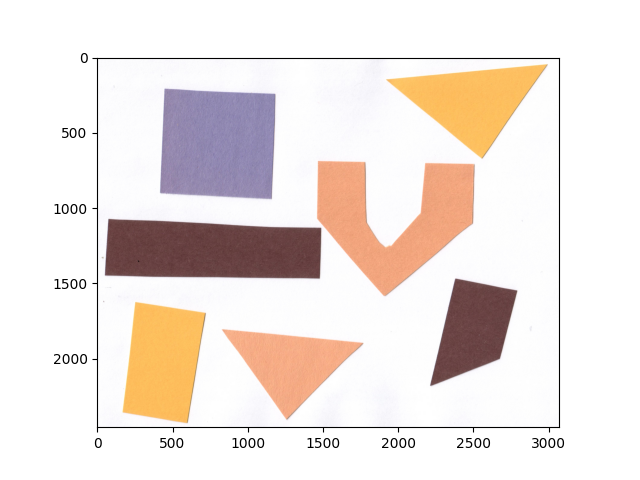

In [10]:
# Simple thresholding
# load the image
shapes01 = iio.imread(uri="data/shapes-01.jpg")

fig, ax = plt.subplots()
ax.imshow(shapes01)

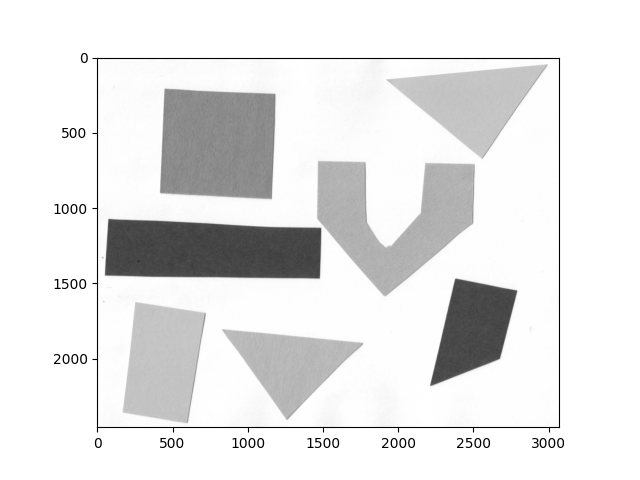

In [11]:
# convert the image to grayscale
gray_shapes = ski.color.rgb2gray(shapes01)

# blur the image to denoise
blurred_shapes = ski.filters.gaussian(gray_shapes, sigma=1.0)

fig, ax = plt.subplots()
ax.imshow(blurred_shapes, cmap="gray")

(256,) (257,)


(0.0, 1.0)

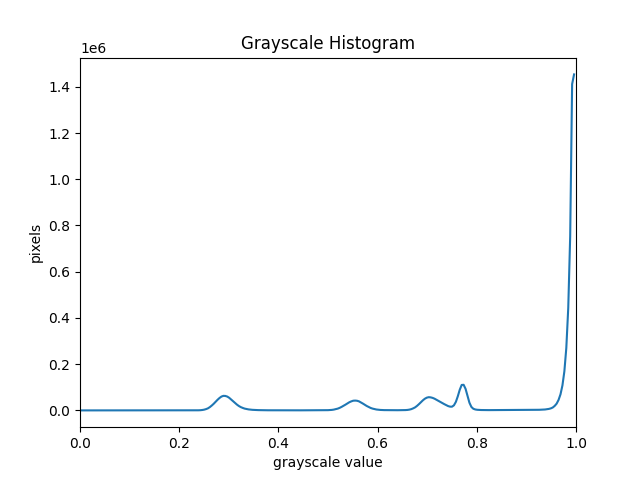

In [12]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_shapes, bins=256, range=(0.0, 1.0))
print(histogram.shape, bin_edges.shape)
      
fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixels")
ax.set_xlim(0, 1.0)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


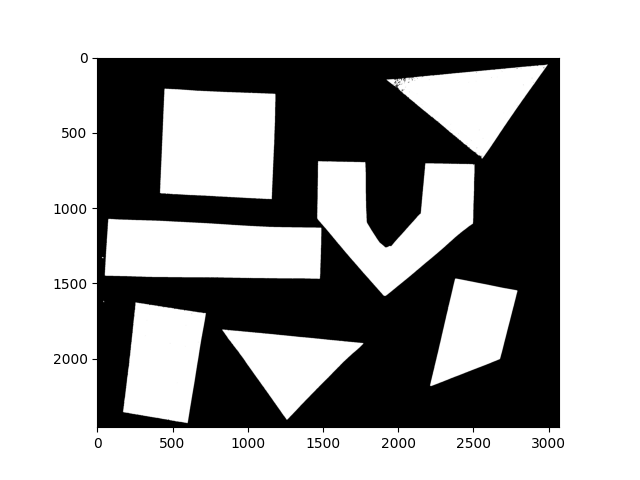

In [13]:
# create a mask based on the threshold
t = 0.8
binary_mask = blurred_shapes < t
print(binary_mask[50,:100])
fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

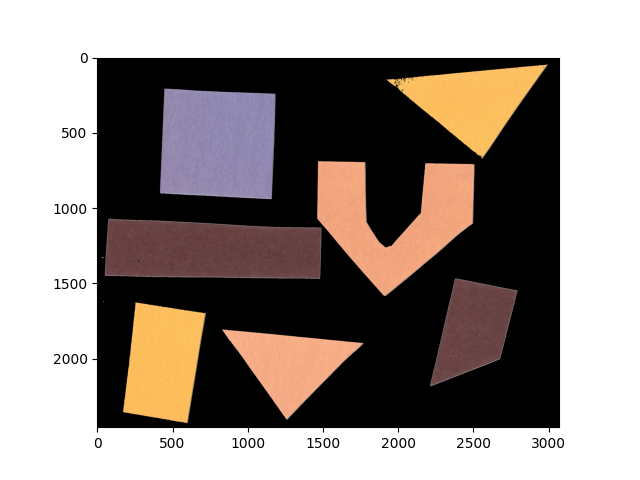

In [14]:
# use the binary_mask to select the interesting part of the image
selection = shapes01.copy()
selection[~binary_mask] = 0


fig, ax = plt.subplots()
ax.imshow(selection)

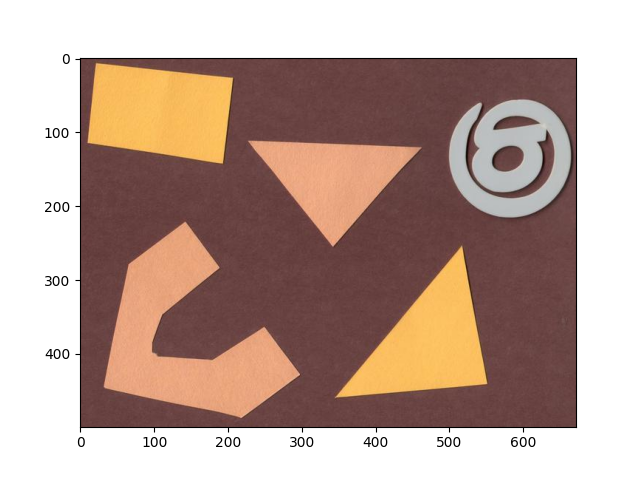

In [15]:
shapes = iio.imread(uri="data/shapes-02.jpg")
fig, ax = plt.subplots()
ax.imshow(shapes)

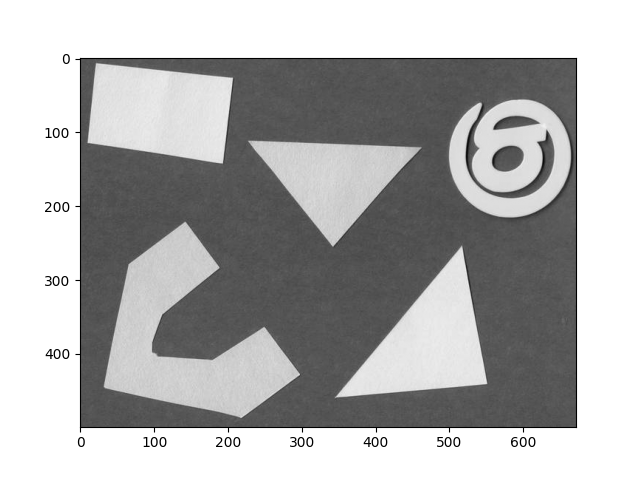

In [16]:
gray_shapes = ski.color.rgb2gray(shapes)
fig, ax = plt.subplots()
ax.imshow(gray_shapes, cmap="gray")

(0.0, 1.0)

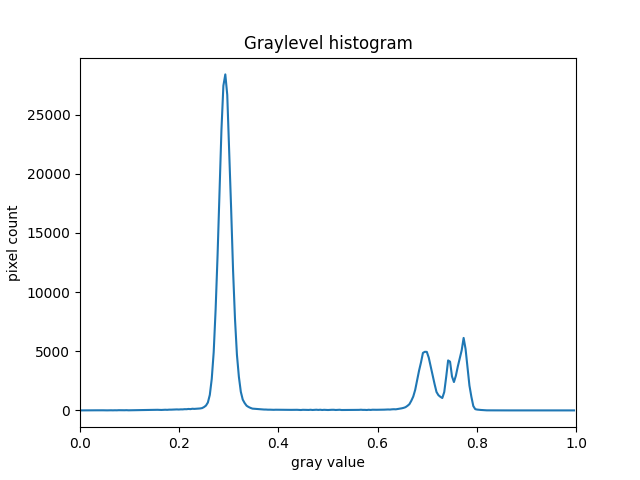

In [17]:

histogram, bin_edges = np.histogram(gray_shapes, bins=256, range=(0.0, 1.0))


fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("Graylevel histogram")
ax.set_xlabel("gray value")
ax.set_ylabel("pixel count")
ax.set_xlim(0, 1.0)


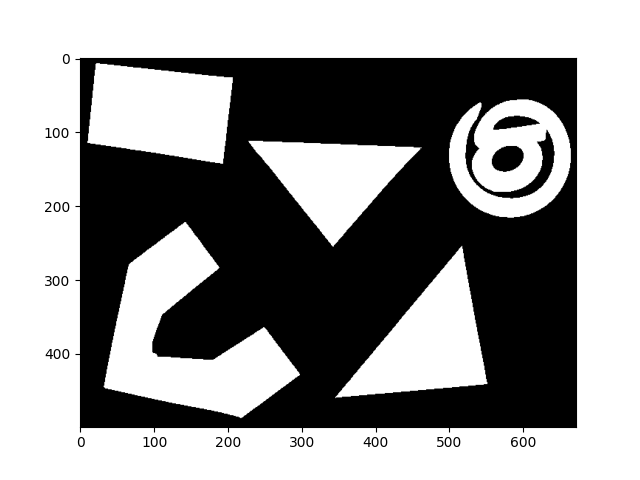

In [18]:
# Here are the commands to create and view the binary mask

t = 0.5
binary_mask = gray_shapes > t

fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

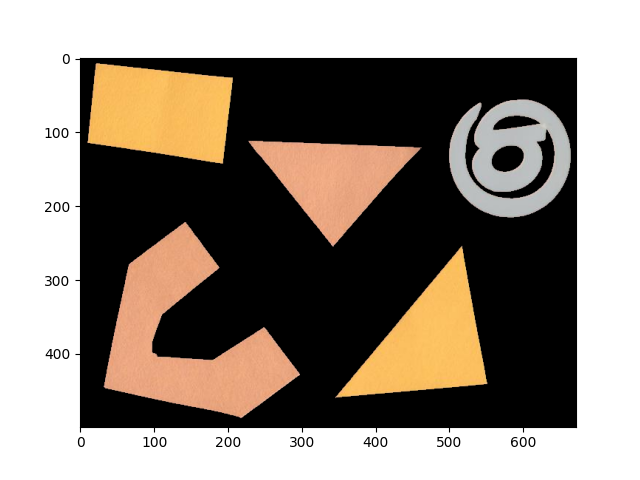

In [20]:
# And here are the commands to apply the mask and view the thresholded image

shapes02 = iio.imread(uri="data/shapes-02.jpg")
selection = shapes02.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
ax.imshow(selection)